## Q5 - Bagging

In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
import numpy as np
import matplotlib.pyplot as plt

#Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

### Part (a) - Train Test split

In [18]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f"Training set size: {X_train.shape[0]} samples, Test set size: {X_test.shape[0]} samples, Feature dimensions: {X_train.shape[1]}")


Training set size: 16512 samples, Test set size: 4128 samples, Feature dimensions: 8


### Part (b) - Resample Function

In [19]:
def resample(X,y):
    """
    Function for resampling a data set (X,y) with replacement 
    yielding a new data set (Xnew,ynew) and the indeces of the 
    resampled data cases.  
    Inputs:
        X: np.ndarray, shape (n_samples, n_features)
        y: np.ndarray, shape (n_samples,)
    Outputs:
        Xnew: np.ndarray, shape (n_samples, n_features)
        ynew: np.ndarray, shape (n_samples,)
        ind: np.ndarray, shape (n_samples,)
    """
    #Add your implementation here
    n_samples = X.shape[0]
    ind = np.random.choice(n_samples, size=n_samples, replace=True)
    Xnew, ynew = X[ind], y[ind]
    
    return Xnew, ynew, ind

In [20]:

X_resampled, y_resampled, ind = resample(X_train, y_train)
n_train = len(X_train)
newIndex= len(np.unique(ind))
percentage = ((n_train - newIndex)/ n_train) * 100

print(f"Percentage of original cases not included in resampled cases: {percentage:.2f}%")


Percentage of original cases not included in resampled cases: 36.51%


### Parts (c) and (d) - BaggedTrees Implementation

In [21]:
class BaggedTrees:
    """
    An implementation of bagged regression trees
    compatible with scikit-learn's fit/predict interface.
    """
    def __init__(self,K):
        """
        Inputs:
            K: int, number of trees in the ensemble
        """
        self.K=K

    def fit(self, X, y):
        """
        Fit the bagged decision tree model. 
        Store the learend trees.
        Inputs:
            X: np.ndarray, shape (n_samples, n_features)
            y: np.ndarray, shape (n_samples,)
        """
        #Add your code here for (c)

        self.trees = []
        for k in range(self.K):
            X_baggedtree, y_baggedtree, k = resample(X, y)
            tree = DecisionTreeRegressor(max_depth=20)
            tree.fit(X_baggedtree, y_baggedtree)
            self.trees.append(tree)
    
    def predict(self, X):
        """
        Predict using the bageed decision tree model.
        Inputs:
            X: np.ndarray, shape (n_samples, n_features)
        Outputs:
            y_pred: np.ndarray, shape (n_samples,)
        """
        #Add your code here for (d)
        preds = []
        for tree in self.trees:
            pred = tree.predict(X)
            preds.append(pred)
        y_pred = np.mean(preds, axis=0)
        return y_pred


### Part (e) - Learning Experiment

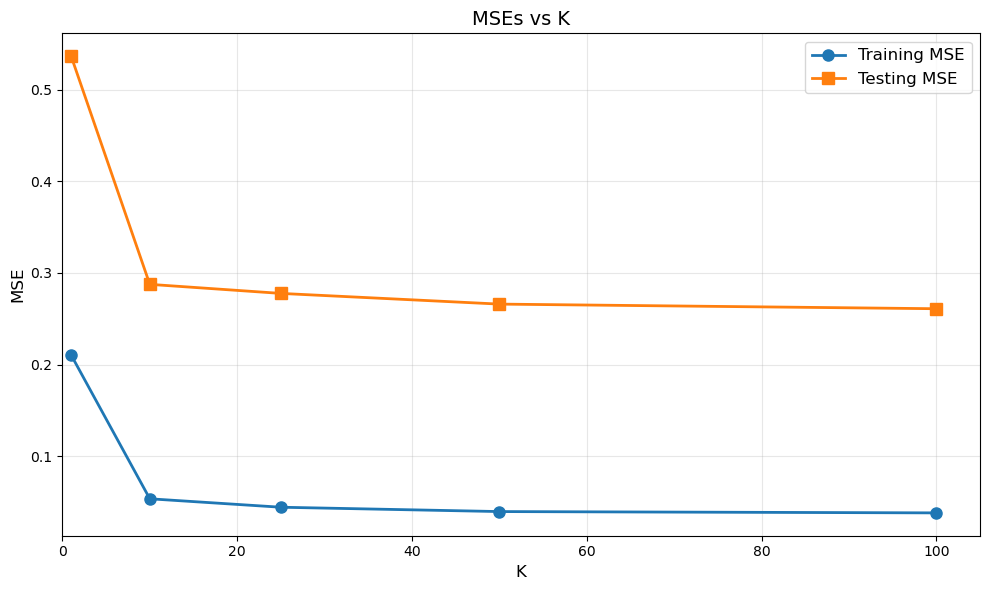

In [25]:

K = [1, 10, 25, 50, 100]
msetr_arr, msetest_arr = [], []
np.random.seed(42)

for k in K:
    model = BaggedTrees(K=k)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    msetr = mse(y_train, train_pred)
    msetest = mse(y_test, test_pred)
    msetr_arr.append(msetr)
    msetest_arr.append(msetest)


plt.figure(figsize=(10, 6))
plt.plot(K, msetr_arr, 'o-', label='Training MSE', linewidth=2, markersize=8)
plt.plot(K, msetest_arr, 's-', label='Testing MSE', linewidth=2, markersize=8)
plt.xlabel('K', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('MSEs vs K', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(0, 105)
plt.tight_layout()
plt.show()

